# 001_EVI vs YIELD CORRELATION DURATION TESTS


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import statsmodels.formula.api as sm
import copy
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import sklearn
from math import sqrt
from functools import reduce
import numpy as np
#import ee
#import geemap
import geopandas as gpd
import rioxarray as rxr
import rasterstats as rs
from rasterio.plot import show
import rasterio

%matplotlib inline

In [2]:
plt.rcParams["font.family"] = "Arial"

# IRRIGATED EVI

In [7]:
points = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/duration_seasonalCompositeNDVI_2017_SUM_JAS.gpkg'
points = gpd.read_file(points)
points = points[(points.Class == 'Irrigated Rice')].groupby(['Class','ADM3_EN']).mean().reset_index()
#points.iloc[:,3:5]

# Rename column headings
points = points.rename(columns=dict(zip(list(points.columns[2:20]), list(np.arange(2001, 2019, 1)))))
points['yr1'] = points.loc[: , 2017:2017].mean(axis=1)
points['yr3'] = points.loc[: , 2014:2017].mean(axis=1)
points['yr5'] = points.loc[: , 2012:2017].mean(axis=1)
points['yr10'] = points.loc[: , 2008:2017].mean(axis=1)
points['yr15'] = points.loc[: , 2003:2017].mean(axis=1)
points['test'] = points.loc[: , 2001:2005].mean(axis=1)
points.head()

## CHANGE THESE
startYear = 2003
endYear = 2017 #2017
duration = '5yr'

actual = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')
actual = actual[(actual.param == 'yield') & (actual.ecosystem == 'irri')].reset_index(drop=True)
actual = actual[(actual.year <= endYear) & (actual.year >= startYear)].groupby('muni').mean().reset_index(drop=False)
actual.head()

merged = pd.merge(actual, points, left_on='muni', right_on='ADM3_EN')
merged

#plt.scatter(merged['value'], merged[duration])
#plt.show()

df = pd.DataFrame(merged,columns=['value','yr1',	'yr3',	'yr5',	'yr10','yr15','test'])
df.corr()
#df

,value,yr1,yr3,yr5,yr10,yr15,test
value,1.000000,0.347583,0.537513,0.555177,0.522735,0.499304,0.273212
yr1,0.347583,1.000000,0.877406,0.915645,0.891992,0.818549,0.481604
yr3,0.537513,0.877406,1.000000,0.972304,0.934850,0.896316,0.624416
yr5,0.555177,0.915645,0.972304,1.000000,0.952178,0.884104,0.550223
yr10,0.522735,0.891992,0.934850,0.952178,1.000000,0.955159,0.588343
yr15,0.499304,0.818549,0.896316,0.884104,0.955159,1.000000,0.705905
test,0.273212,0.481604,0.624416,0.550223,0.588343,0.705905,1.000000


In [15]:
results = sm.ols(formula = 'np.log(value) ~ np.log(yr5)', 
                 #missing='drop',
                 data=df).fit()
print(results.summary())
intercept, slope = results.params
print('{number:.{digits}f}'.format(number=intercept, digits=4) + ' + ' '{number:.{digits}f}'.format(number=slope, digits=4) + '*ndvi')


                            OLS Regression Results                            
Dep. Variable:          np.log(value)   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     26.93
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           8.96e-05
Time:                        16:23:48   Log-Likelihood:                 31.607
No. Observations:                  18   AIC:                            -59.21
Df Residuals:                      16   BIC:                            -57.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1575      0.317     -0.497      

/Users/delatorredm/miniconda3/envs/ee/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


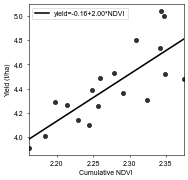

In [16]:
fig, ax = plt.subplots(figsize=[4,4],dpi=50) #dpi=300
sns.regplot(x='yr5',
            y='value',
            data=df,
            order=1,
            ci=None,
            robust=False,
            scatter_kws={"color": "black"},
            line_kws={'label':"yield={1:.2f}+{0:.2f}*NDVI".format(slope,intercept),
                      'color':'black'},
            ax=ax)
plt.xlabel('Cumulative NDVI')
plt.ylabel('Yield (t/ha)')
ax.legend()
plt.show()

# RAINFED

In [18]:
points = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/duration_seasonalCompositeNDVI_2017_SUM_JFM.gpkg'
points = gpd.read_file(points)
points = points.groupby(['Class','ADM3_EN']).mean().reset_index()
points = points.loc[points['Class']=='Rain-fed Rice']
#points = points.loc[points['ADM3_EN'].isin([
#'Carles',
#'Calinog',
#'Estancia',
#'Lambunao',
#'Cabatuan',
#'Duenas',
#'Santa Barbara',
#'Bingawan',
#'Maasin',
#'Badiangan'
#])]



# Rename column headings
points = points.rename(columns=dict(zip(list(points.columns[2:20]), list(np.arange(2001, 2019, 1)))))
points['yr1'] = points.loc[: , 2017:2017].mean(axis=1)
points['yr3'] = points.loc[: , 2014:2017].mean(axis=1)
points['yr5'] = points.loc[: , 2012:2017].mean(axis=1)
points['yr10'] = points.loc[: , 2008:2017].mean(axis=1)
points['yr15'] = points.loc[: , 2003:2017].mean(axis=1)
points['test'] = points.loc[: , 2001:2005].mean(axis=1)
points.head()

## CHANGE THESE
startYear = 2012
endYear = 2017 #2017
duration = '5yr'

actual = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')
actual = actual[(actual.param == 'yield') & (actual.ecosystem == 'rf')].reset_index(drop=True)
actual = actual[(actual.year <= endYear) & (actual.year >= startYear)].groupby('muni').mean().reset_index(drop=False)
actual.head()

merged = pd.merge(actual, points, left_on='muni', right_on='ADM3_EN')
merged

#plt.scatter(merged['value'], merged[duration])
#plt.show()

df = pd.DataFrame(merged,columns=['value','yr1',	'yr3',	'yr5',	'yr10','yr15','test'])
df.corr()


,value,yr1,yr3,yr5,yr10,yr15,test
value,1.000000,-0.085919,-0.095211,-0.102178,-0.148403,-0.134089,-0.152055
yr1,-0.085919,1.000000,0.848190,0.844519,0.810557,0.761032,0.682454
yr3,-0.095211,0.848190,1.000000,0.994794,0.982361,0.971108,0.928788
yr5,-0.102178,0.844519,0.994794,1.000000,0.990351,0.975482,0.929058
yr10,-0.148403,0.810557,0.982361,0.990351,1.000000,0.990541,0.952920
yr15,-0.134089,0.761032,0.971108,0.975482,0.990541,1.000000,0.979899
test,-0.152055,0.682454,0.928788,0.929058,0.952920,0.979899,1.000000


In [22]:
results = sm.ols(formula = 'np.log(value) ~ np.log(yr5)', 
                 missing='drop',
                 data=df).fit()
print(results.summary())
intercept, slope = results.params
print('{number:.{digits}f}'.format(number=intercept, digits=4) + ' + ' '{number:.{digits}f}'.format(number=slope, digits=4) + '*ndvi')


                            OLS Regression Results                            
Dep. Variable:          np.log(value)   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     14.63
Date:                Wed, 15 Dec 2021   Prob (F-statistic):            0.00872
Time:                        16:26:19   Log-Likelihood:                 10.443
No. Observations:                   8   AIC:                            -16.89
Df Residuals:                       6   BIC:                            -16.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0619      0.307      0.201      

/Users/delatorredm/miniconda3/envs/ee/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


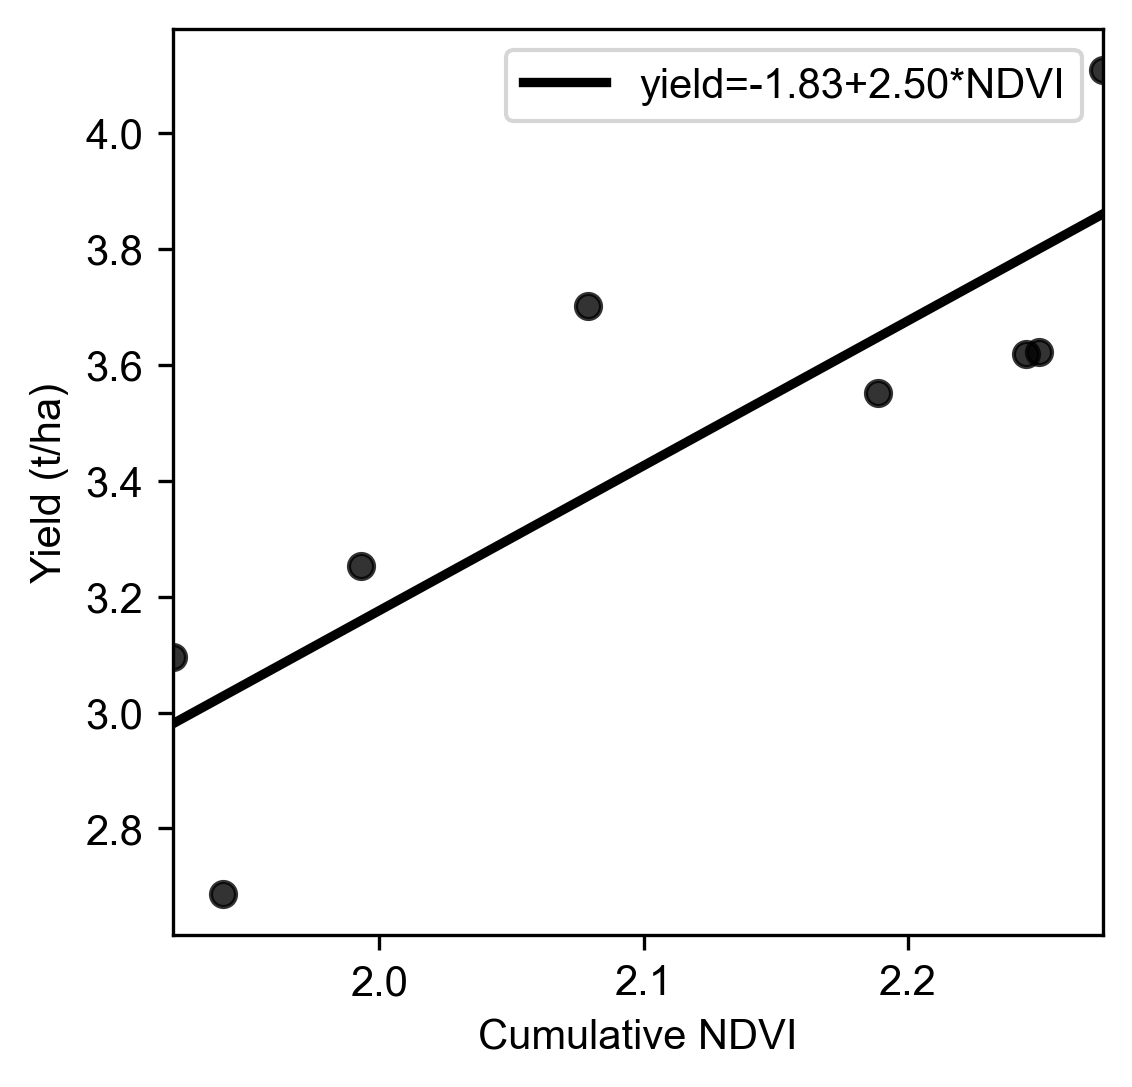

In [7]:

fig, ax = plt.subplots(figsize=[4,4],dpi=300) #dpi=300
sns.regplot(x='yr5',
            y='value',
            data=df,
            order=1,
            ci=None,
            robust=False,
            scatter_kws={"color": "black"},
            line_kws={'label':"yield={1:.2f}+{0:.2f}*NDVI".format(slope,intercept),
                      'color':'black'},
            ax=ax)
plt.xlabel('Cumulative NDVI')
plt.ylabel('Yield (t/ha)')
ax.legend()
plt.show()

## FORMULA TYPES TEMPLATES

In [ ]:
formula = 'value ~ yr5'
formula = 'value ~ yr5 + I(yr5 ** 2.0) + I(yr5 ** 3.0)'